In [79]:
# Libraries
import math
import pandas as pd
import sympy as smp
import numpy as np
from sympy import *
from math import *

# Scipy stats
from scipy.stats import rv_discrete
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import uniform

# Scipy operations
from scipy.integrate import quad
from scipy.misc import derivative
import scipy.integrate as integrate
import scipy.special as special

# Miscellaneous
import matplotlib.pyplot as plt
# from fractions import Fraction
from sympy import Rational as R
from sympy import nsimplify
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML

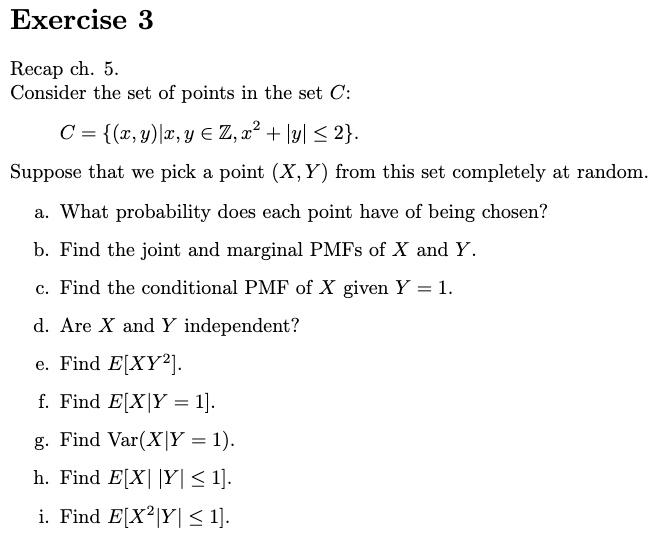

In [2]:
# Example exercise
Image('https://cdn.mathpix.com/snip/images/D1iNY2YWPS364-0UsR8YDFu8pLMAMTnFROhbdHsIb1U.original.fullsize.png', width = 500)

In [3]:
# If it needs a constant to be calculated, otherwise skip to declare the dataframe since we are given directly the joint pmf:
# a)

c = symbols('c')

# Define the equations
eq = Eq(11*c, 1)

# Solve the set of equations
result = solve(eq, c)
result = nsimplify(result[0], tolerance=1e-10)
print("c:  {} , {}".format(result, float(result)))

c:  1/11 , 0.09090909090909091


In [78]:

# -------------------- Helper functions --------------------
normalize_ratios = lambda df: df.applymap(R) / df.applymap(R).sum().sum()


# -------------------- Declare the joint distribution values --------------------
Index = [-2, -1, 0, 1, 2]
Columns = {
    -2: [0,       0,       0,       0,       0],
    -1: [0,       R(1,11), R(1,11), R(1,11), 0],
    0:  [R(1,11), R(1,11), R(1,11), R(1,11), R(1,11)],
    1:  [0,       R(1,11), R(1,11), R(1,11), 0],
    2:  [0,       0,       0,       0,       0]
}
joint_pmf_df = pd.DataFrame(data = Columns, index = Index)


# -------------------- Calculate the marginal probabilities of X and Y --------------------
marginal_pmf_x = joint_pmf_df.sum(axis = 0)
marginal_pmf_y = joint_pmf_df.apply(sum, axis = 1)

print("Marginal PMF of X: ")
print(marginal_pmf_x)
print()

print("Marginal PMF of Y: ")
print(marginal_pmf_y)
print()


# -------------------- Check if the variables are independent --------------------
# Convert the DataFrame values to floating-point numbers
joint_pmf_float = joint_pmf_df.astype(float)

# Calculate the marginal probabilities of X and Y
marginal_pmf_x_float = joint_pmf_float.sum(axis = 0)
marginal_pmf_y_float = joint_pmf_float.sum(axis = 1)

# Check if X and Y are independent
is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y_float[:, np.newaxis] * marginal_pmf_x_float.values).all()

if is_independent:
    print("X and Y are independent.")
else:
    print("X and Y are not independent.")

print()


# -------------------- Pre-computed formulas --------------------

E_X = np.array(joint_pmf_df.columns).dot(marginal_pmf_x.values)
E_Y = np.array(joint_pmf_df.index).dot(marginal_pmf_y.values)
E_X_Y = np.array(joint_pmf_df.index).dot(np.array(joint_pmf_df)).dot(np.array(joint_pmf_df.columns))

E_X2 = (np.array(joint_pmf_df.columns)**2).dot(marginal_pmf_x.values)
E_Y2 = (np.array(joint_pmf_df.index)**2).dot(marginal_pmf_y.values)
E_X_Y2 = (np.array(joint_pmf_df.index)**2).dot(np.array(joint_pmf_df)).dot(np.array(joint_pmf_df.columns))
E_X2_Y = np.array(joint_pmf_df.index).dot(np.array(joint_pmf_df)).dot((np.array(joint_pmf_df.columns)**2))
E_X2_Y2 = (np.array(joint_pmf_df.index)**2).dot(np.array(joint_pmf_df)).dot((np.array(joint_pmf_df.columns)**2))


E_X_GIVEN_Y_IS_1 = (np.array(joint_pmf_df[1]) / marginal_pmf_y[1]).dot(np.array(joint_pmf_df.columns))
E_X2_GIVEN_Y_IS_1 = (np.array(joint_pmf_df[1]) / marginal_pmf_y[1]).dot(np.array(joint_pmf_df.columns)**2)



GIVEN_JOINT_PMF_DF = normalize_ratios(joint_pmf_df[joint_pmf_df.index <= 1])
E_X_GIVEN_Y_LESS_OR_EQUAL_1 = np.array(GIVEN_JOINT_PMF_DF.columns).dot(GIVEN_JOINT_PMF_DF.sum(axis = 0).values)
E_X2_GIVEN_Y_LESS_OR_EQUAL_1 = np.array(GIVEN_JOINT_PMF_DF.columns**2).dot(GIVEN_JOINT_PMF_DF.sum(axis = 0).values)

GIVEN_JOINT_PMF_DF = normalize_ratios(joint_pmf_df.loc[:, joint_pmf_df.columns <= 1])
E_Y_GIVEN_X_LESS_OR_EQUAL_1 = np.array(GIVEN_JOINT_PMF_DF.index).dot(GIVEN_JOINT_PMF_DF.sum(axis = 1).values)
E_Y2_GIVEN_X_LESS_OR_EQUAL_1 = np.array(GIVEN_JOINT_PMF_DF.index**2).dot(GIVEN_JOINT_PMF_DF.sum(axis = 1).values)



# Make the numerical labels absolute and group by the absolute numerical labels, summing the values within each group
ABS_Y_JOINT_PMF_DF = joint_pmf_df.groupby(lambda y: abs(int(y))).apply(sum, axis = 0)

# Filter the absolute joint distribution for Y ≤ 1
ABS_Y_JOINT_PMF_DF = normalize_ratios(ABS_Y_JOINT_PMF_DF[ABS_Y_JOINT_PMF_DF.index <= 1])

E_X_GIVEN_ABS_Y_LESS_OR_EQUAL_1 = np.array(ABS_Y_JOINT_PMF_DF.columns).dot(ABS_Y_JOINT_PMF_DF.sum(axis = 0).values)



V_X = E_X2 - E_X**2
V_Y = E_Y2 - E_Y**2


V_X_GIVEN_Y_IS_1 = E_X2_GIVEN_Y_IS_1 - E_X_GIVEN_Y_IS_1**2



print("E[X]:  {} , {}".format(E_X, round(float(E_X), 2)))
print("E[Y]:  {} , {}".format(E_Y, round(float(E_Y), 2)))
print("E[X^2]:  {} , {}".format(E_X2, round(float(E_X2), 2)))
print("E[Y^2]:  {} , {}".format(E_Y2, round(float(E_Y2), 2)))
print("E[X*Y]: {} , {}".format(E_X_Y, round(float(E_X_Y), 2)))
print("E[X*Y^2]: {} , {}".format(E_X_Y2, round(float(E_X_Y2), 2)))
print("E[X^2*Y]: {} , {}".format(E_X2_Y, round(float(E_X2_Y), 2)))
print("E[X^2*Y^2]: {} , {}".format(E_X2_Y2, round(float(E_X2_Y2), 2)))

print("E[X|Y=1]: {} , {}".format(E_X_GIVEN_Y_IS_1, round(float(E_X_GIVEN_Y_IS_1), 2)))
print("E[X^2|Y=1]: {} , {}".format(E_X2_GIVEN_Y_IS_1, round(float(E_X2_GIVEN_Y_IS_1), 2)))

print("E[X|Y<=1]: {} , {}".format(E_X_GIVEN_Y_LESS_OR_EQUAL_1, round(float(E_X_GIVEN_Y_LESS_OR_EQUAL_1), 2)))
print("E[X^2|Y<=1]: {} , {}".format(E_X2_GIVEN_Y_LESS_OR_EQUAL_1, round(float(E_X2_GIVEN_Y_LESS_OR_EQUAL_1), 2)))

print("E[Y|X<=1]: {} , {}".format(E_Y_GIVEN_X_LESS_OR_EQUAL_1, round(float(E_Y_GIVEN_X_LESS_OR_EQUAL_1), 2)))
print("E[Y^2|X<=1]: {} , {}".format(E_Y2_GIVEN_X_LESS_OR_EQUAL_1, round(float(E_Y2_GIVEN_X_LESS_OR_EQUAL_1), 2)))

print("E[X|abs(Y)<=1]: {} , {}".format(E_X_GIVEN_ABS_Y_LESS_OR_EQUAL_1, round(float(E_X_GIVEN_ABS_Y_LESS_OR_EQUAL_1), 2)))

print("Var[X]:  {} , {}".format(V_X, round(float(V_X), 2)))
print("Var[Y]:  {} , {}".format(V_Y, round(float(V_Y), 2)))

print("Var[X|Y=1]: {} , {}".format(V_X_GIVEN_Y_IS_1, round(float(V_X_GIVEN_Y_IS_1), 2)))

Marginal PMF of X: 
-2       0
-1    3/11
 0    5/11
 1    3/11
 2       0
dtype: object

Marginal PMF of Y: 
-2    1/11
-1    3/11
 0    3/11
 1    3/11
 2    1/11
dtype: object

X and Y are not independent.

E[X]:  0 , 0.0
E[Y]:  0 , 0.0
E[X^2]:  6/11 , 0.55
E[Y^2]:  14/11 , 1.27
E[X*Y]: 0 , 0.0
E[X*Y^2]: 0 , 0.0
E[X^2*Y]: 0 , 0.0
E[X^2*Y^2]: 4/11 , 0.36
E[X|Y=1]: 0 , 0.0
E[X^2|Y=1]: 2/3 , 0.67
E[X|Y<=1]: 0 , 0.0
E[X^2|Y<=1]: 3/5 , 0.6
E[Y|X<=1]: 0.0 , 0.0
E[Y^2|X<=1]: 1.2727272727272727 , 1.27
E[X|abs(Y)<=1]: 0 , 0.0
Var[X]:  6/11 , 0.55
Var[Y]:  14/11 , 1.27
Var[X|Y=1]: 2/3 , 0.67


/var/folders/22/rg8206c93c77krq73zpytwzr0000gn/T/ipykernel_37312/2615099236.py:39: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y_float[:, np.newaxis] * marginal_pmf_x_float.values).all()
